In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Feedback de tus modelos

<div class="alert alert-success">
  Ciertos modelos como la regresión o los arboles se dicen **"interpretables"**. Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o **"insights"**.
</div>

En particular la regresión Lasso es interpretable: 

- mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
- la regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [3]:
X = pd.read_csv('intermediate_results/X.csv')

y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [4]:
from sklearn.linear_model import Lasso

model = Lasso()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
len(X_train)/len(X)

0.74966231427285

In [7]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
model.score(X_test,y_test)

0.7210659700757613

In [9]:
model.coef_

array([ 1.27190023e+00, -2.42824980e+05, -1.71757546e+00,  9.98688029e+04,
       -9.35075965e+01,  8.44765877e-03,  2.55775846e+07,  5.74306542e+00,
       -1.27657482e+04])

In [10]:
var = np.floor(np.log10(np.abs(model.coef_)))

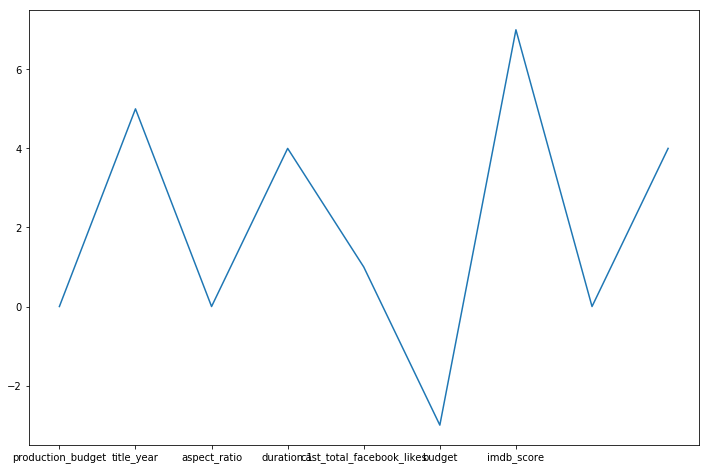

In [11]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

Esto nos guía a guardar únicamente las que marcan valores positivos, las cuales son:

- production_budget
- title_year
- duration
- cast_total_facebook_likes
- imdb_score

## Correlación entre variables

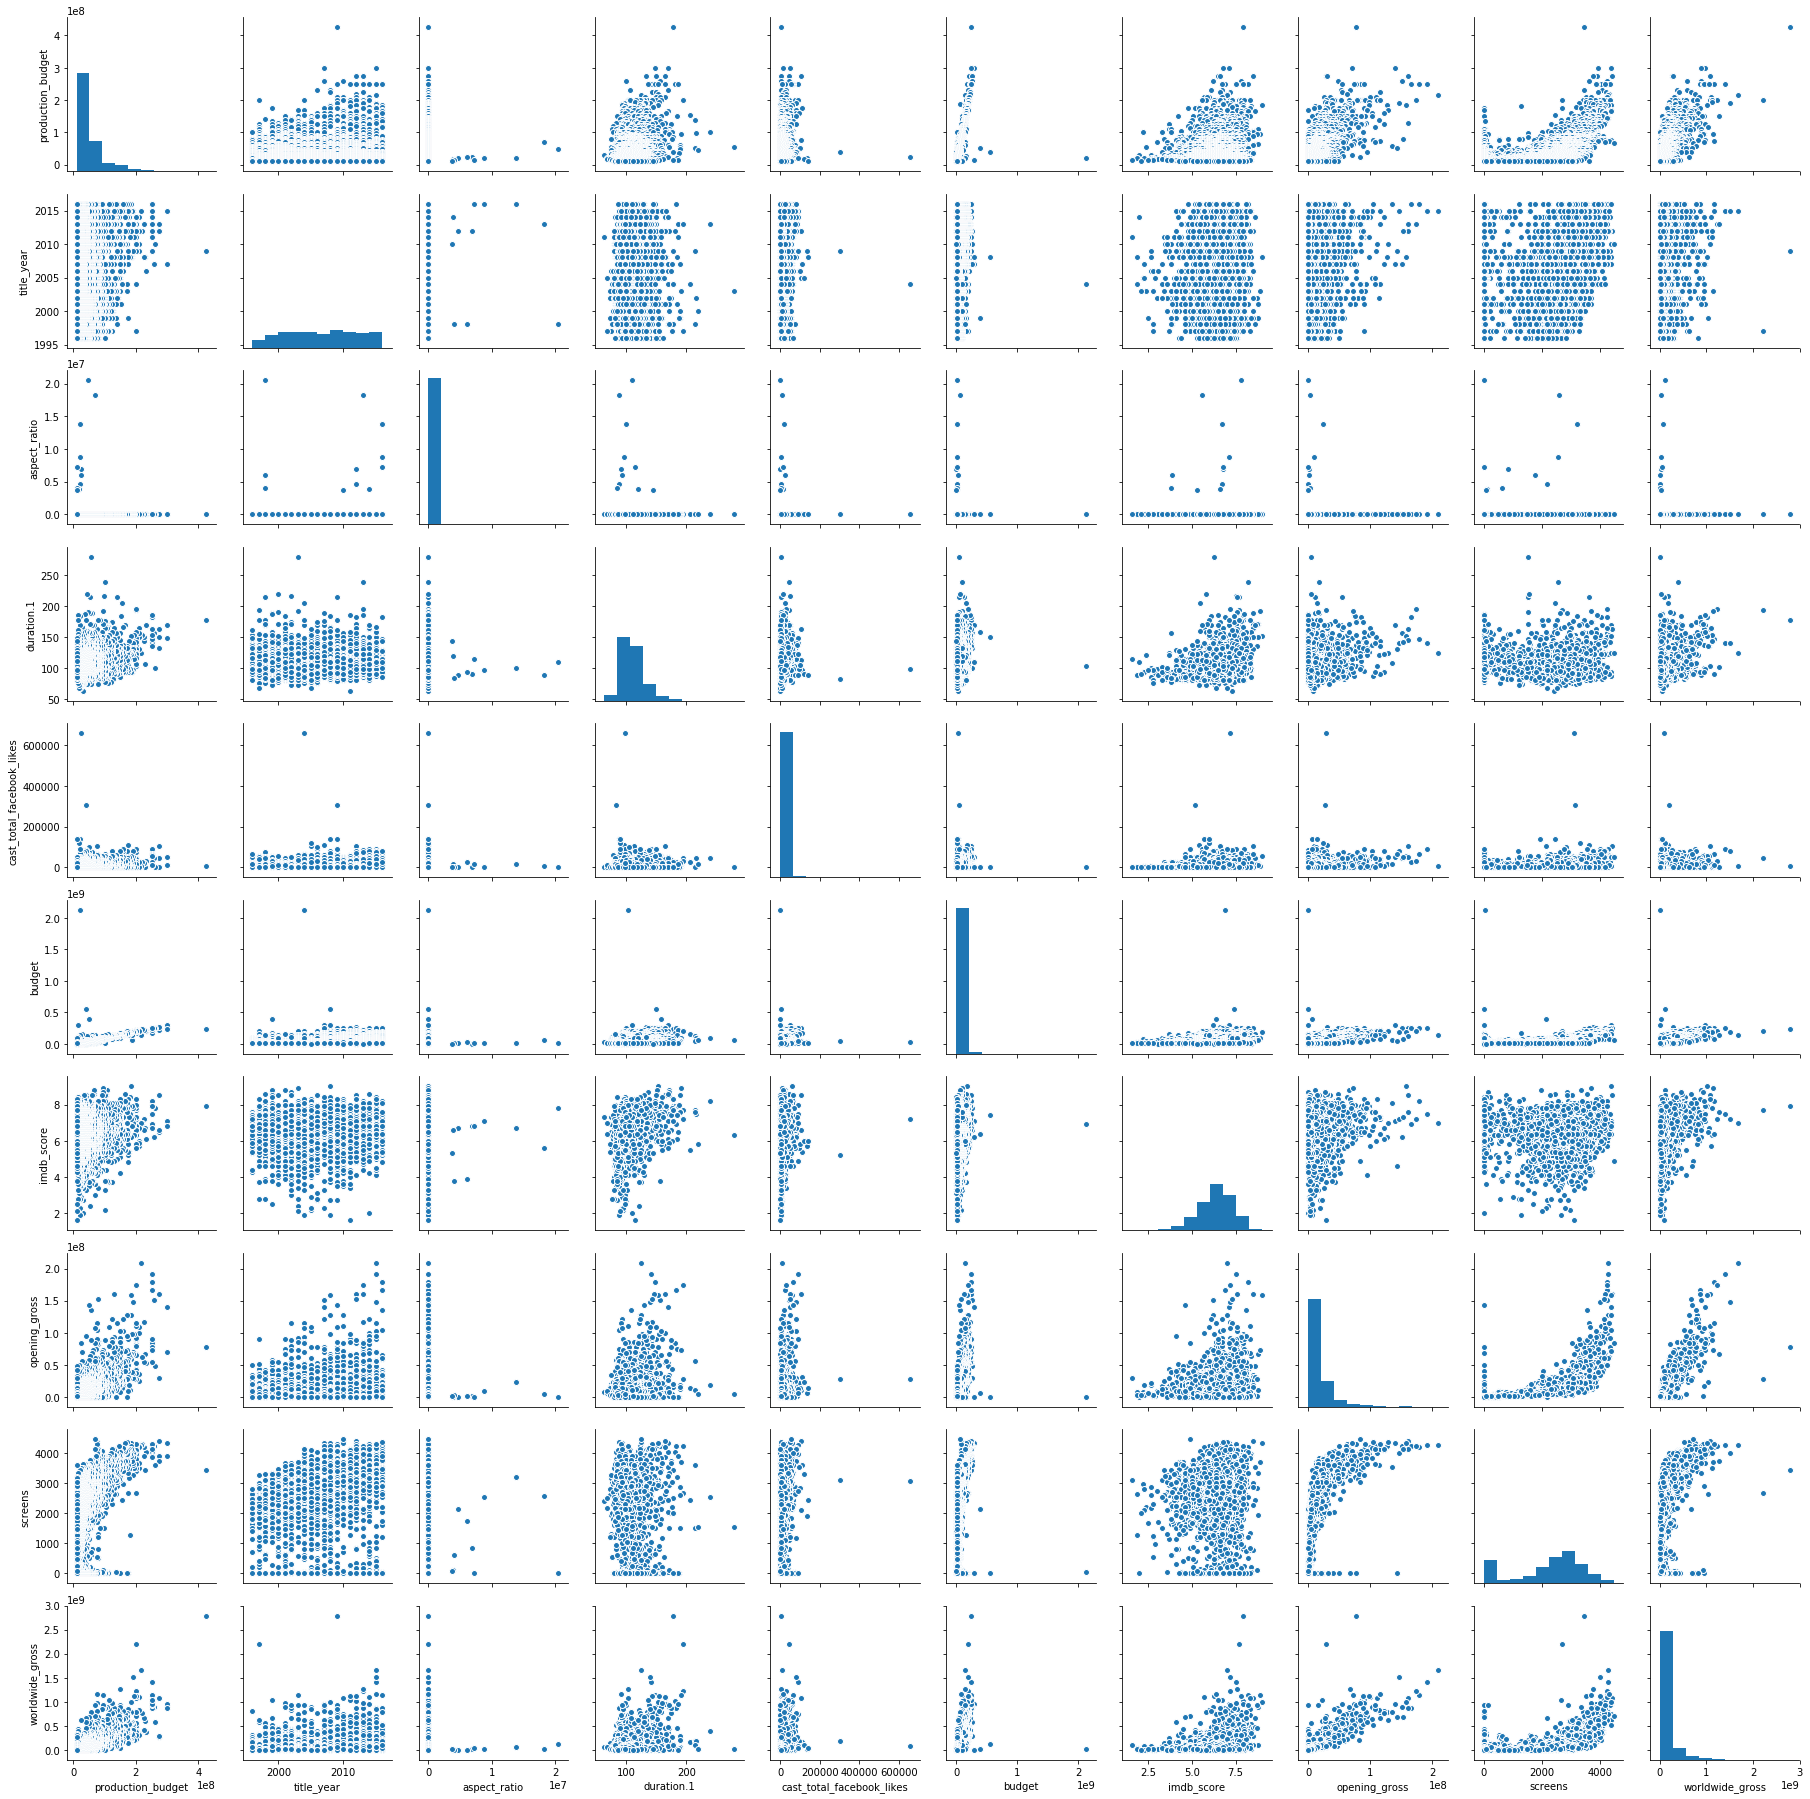

In [12]:
import seaborn as sns

Z = pd.concat([X,y],axis=1)
sns.pairplot(Z)

<div class="alert alert-success">
  La diagonal principal son las distribuciones de las variables (conteos) las demas son graficas de correlación entre las variables que se cruzan.  <br/>
  
  __LAS TENTENCIAS EN LAS GRAFICAS A FORMAR UNA DIAGONAL NOS MUESTRA QUE LAS VARIABLES QUE SE ESTÁN CRUZANDO TIENEN CORRELACIÓN__
</div>

In [13]:
#Esto nos permite agrupar los valores en intervalos
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 = pd.concat([X,clase],axis=1)
Z2.head(2)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens,class
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0,7
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0,5


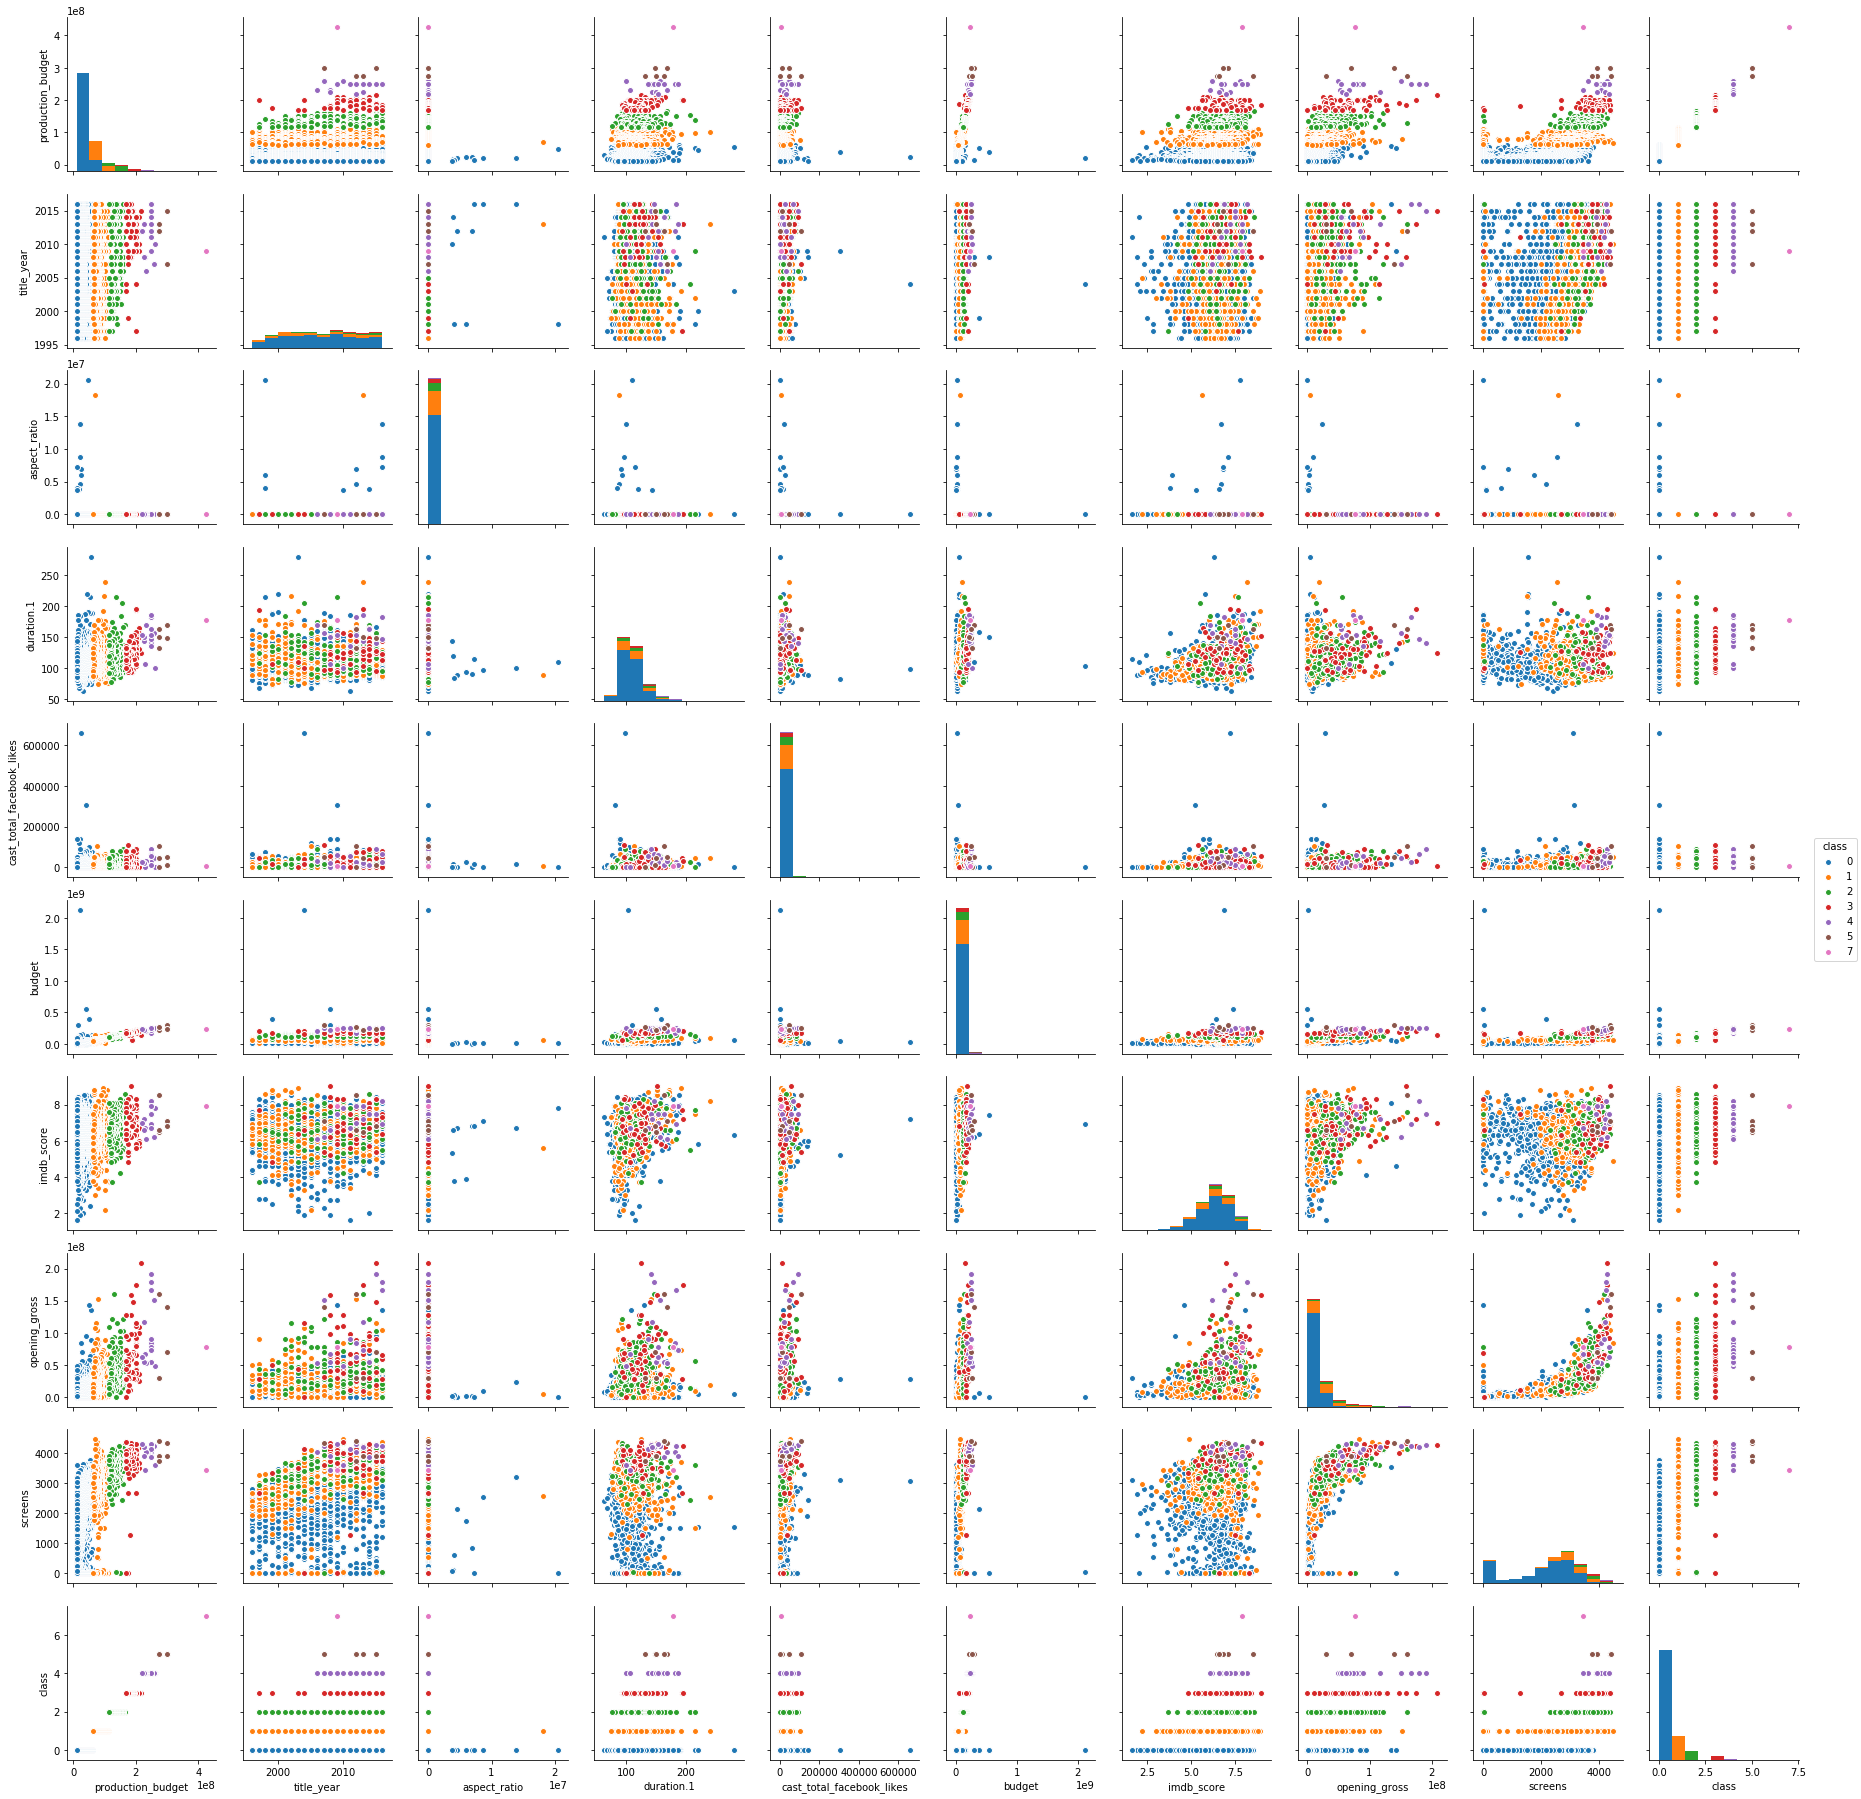

In [14]:
sns.pairplot(Z2,hue='class')

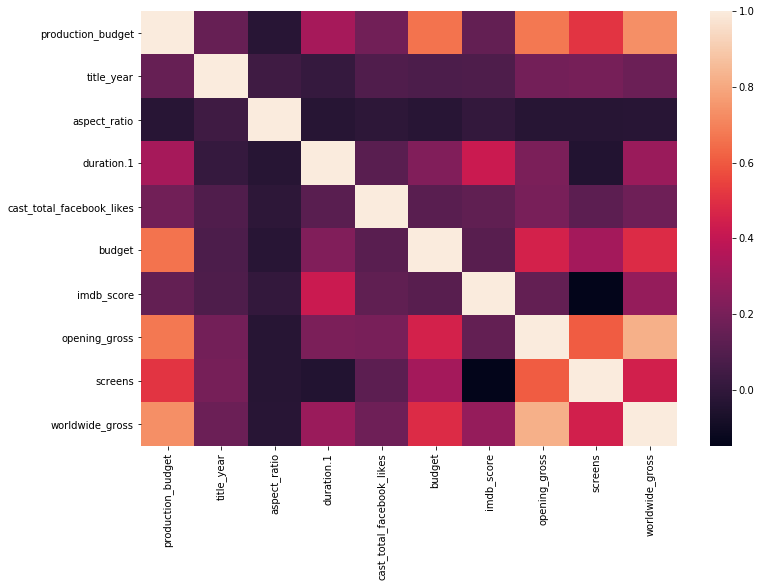

In [15]:
Z3 = pd.concat([X,y],axis=1)
sns.heatmap(Z3.corr())

De esto concluimos, sin sorpresa, que son muy importantes:

- production_budget
- imdb_score

## Metodos de selección automatica de features

<div class="alert alert-info">
  Sklearn posee una serie de métodos para seleccionar las mejores features. Estos métodos los puedes encontrar en sklearn.feature_selection
</div>

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
      score_func=<function mutual_info_regression at 0x7f3ec9e89048>)

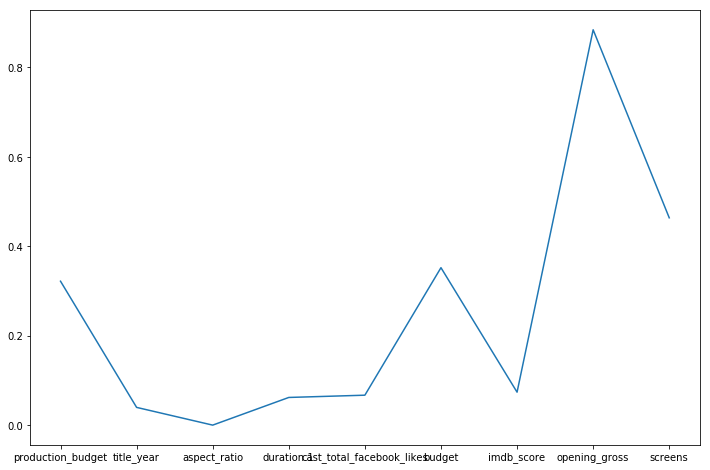

In [17]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(9),list(X.columns));

Del analisis univariante obtenemos que las mejores features son:

- production_budget
- cast_total_facebook_likes
- budget

**Guardaremos las 5 features entregadas por la interpretación de nuestra regresión Lasso**

In [18]:
X2 = X[['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

## Veamos los resultados del modelo con estas features

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [20]:
cols2 = ['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [21]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.7818101870546593
0.5529494627651472
0.552575729532206


In [23]:
# En ocaciones puede no ser tan util reducir las dimensiones